In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

In [2]:
df_completo = pd.read_csv('df_completo.csv', low_memory=False)

In [3]:
df_completo

,user_id,playtime_forever,genres,app_name,release_date,tags,price,id,developer,item_id_y,recommend,posted year,sentiment_score
0,76561197970982479,6,['Action'],Counter-Strike,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",9.99,10,Valve,1250,True,2011,0
1,76561197970982479,6,['Action'],Counter-Strike,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",9.99,10,Valve,22200,True,2011,0
2,76561197970982479,6,['Action'],Counter-Strike,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",9.99,10,Valve,43110,True,2011,0
3,js41637,0,['Action'],Counter-Strike,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",9.99,10,Valve,251610,True,2014,0
4,js41637,0,['Action'],Counter-Strike,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",9.99,10,Valve,227300,True,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41405,BBiiiirr,0,['Indie'],Real Horror Stories Ultimate Edition,2014-04-01,"['Horror', 'Indie', 'Point & Click', 'Comedy',...",1.99,281370,GameORE,72850,True,2015,2
41406,BBiiiirr,0,['Indie'],Real Horror Stories Ultimate Edition,2014-04-01,"['Horror', 'Indie', 'Point & Click', 'Comedy',...",1.99,281370,GameORE,730,True,2015,0
41407,76561198222628548,1222,"['Action', 'Free to Play', 'Indie', 'RPG', 'St...",Dungeon Defenders II,2017-06-20,"['Tower Defense', 'Free to Play', 'Multiplayer...",Free to Play,236110,Trendy Entertainment,370240,False,2015,2
41408,76561198222628548,1222,"['Action', 'Free to Play', 'Indie', 'RPG', 'St...",Dungeon Defenders II,2017-06-20,"['Tower Defense', 'Free to Play', 'Multiplayer...",Free to Play,236110,Trendy Entertainment,359800,True,2015,0


In [4]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41410 entries, 0 to 41409
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           41410 non-null  object
 1   playtime_forever  41410 non-null  int64 
 2   genres            41410 non-null  object
 3   app_name          41410 non-null  object
 4   release_date      41410 non-null  object
 5   tags              41410 non-null  object
 6   price             41410 non-null  object
 7   id                41410 non-null  int64 
 8   developer         41410 non-null  object
 9   item_id_y         41410 non-null  int64 
 10  recommend         41410 non-null  bool  
 11  posted year       41410 non-null  int64 
 12  sentiment_score   41410 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 3.8+ MB


In [5]:
df_completo.describe()

,playtime_forever,id,item_id_y,posted year,sentiment_score
count,41410.000000,41410.000000,41410.000000,41410.000000,41410.000000
mean,4769.494253,5003.168075,156082.313475,2014.152427,0.315624
std,13615.169783,23240.343089,124703.643584,0.847295,0.728741
min,0.000000,10.000000,10.000000,2010.000000,0.000000
25%,91.000000,220.000000,7670.000000,2014.000000,0.000000
50%,602.000000,300.000000,209650.000000,2014.000000,0.000000
75%,2927.000000,4000.000000,248800.000000,2015.000000,0.000000
max,336763.000000,326460.000000,428880.000000,2015.000000,2.000000


In [6]:
df_EDA = df_completo.select_dtypes(include= (int,float))

In [7]:
df_EDA

,playtime_forever,id,item_id_y,posted year,sentiment_score
0,6,10,1250,2011,0
1,6,10,22200,2011,0
2,6,10,43110,2011,0
3,0,10,251610,2014,0
4,0,10,227300,2013,0
...,...,...,...,...,...
41405,0,281370,72850,2015,2
41406,0,281370,730,2015,0
41407,1222,236110,370240,2015,2
41408,1222,236110,359800,2015,0


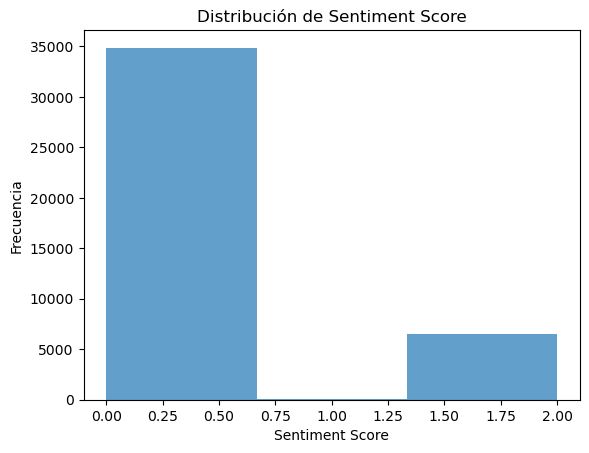

In [8]:
# Histograma de sentiment_score
plt.hist(df_EDA['sentiment_score'], bins=3, alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentiment Score')
plt.show()

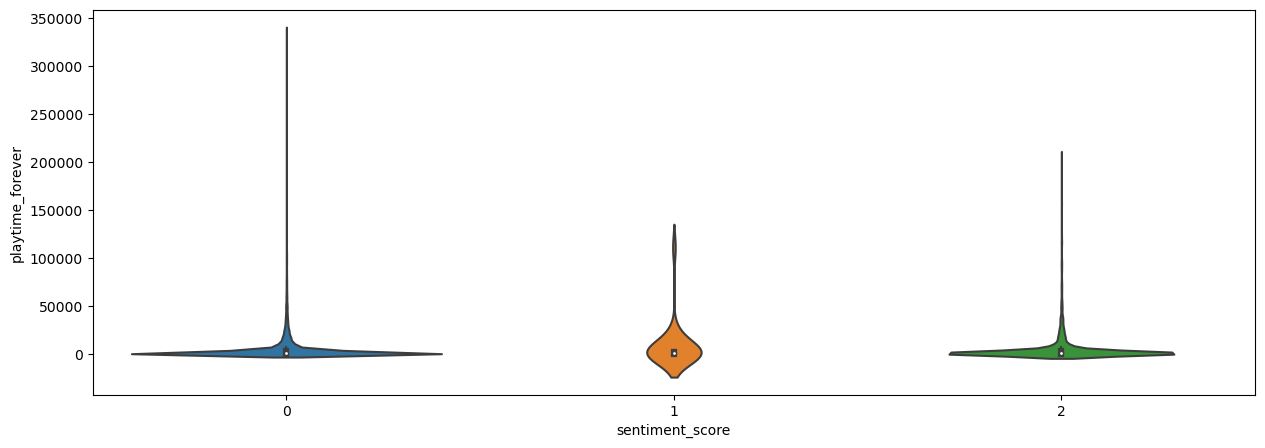

In [9]:
plt.figure(figsize=(15, 5))
sns.violinplot(x='sentiment_score', y='playtime_forever', data=df_EDA)
plt.show()

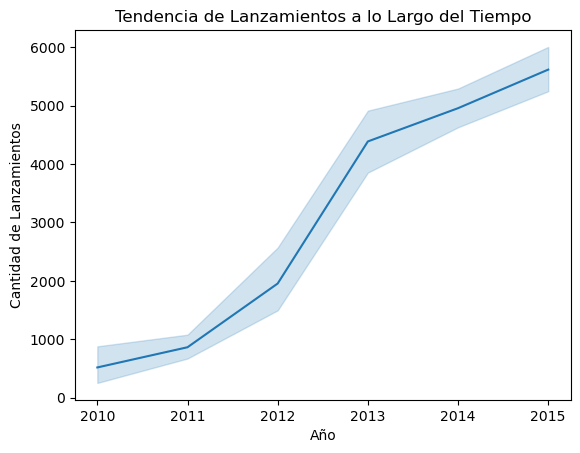

In [10]:
# Gráfico de líneas para 'year'
sns.lineplot(data=df_completo, x='posted year', y='id')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.title('Tendencia de Lanzamientos a lo Largo del Tiempo')
plt.show()

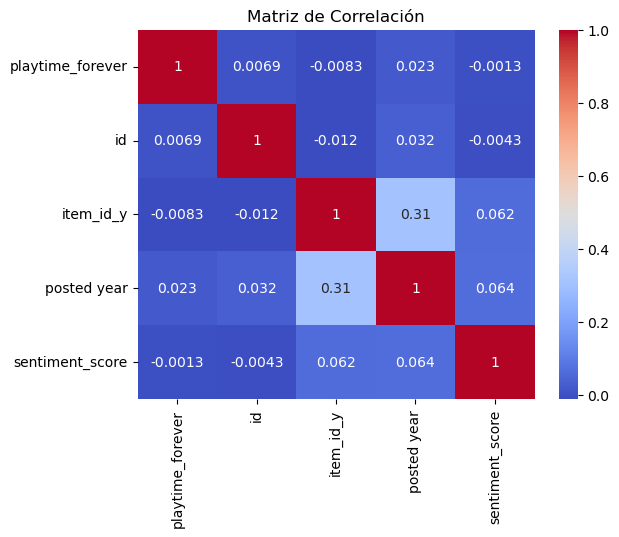

In [11]:
# Matriz de correlación
correlation_matrix = df_EDA.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

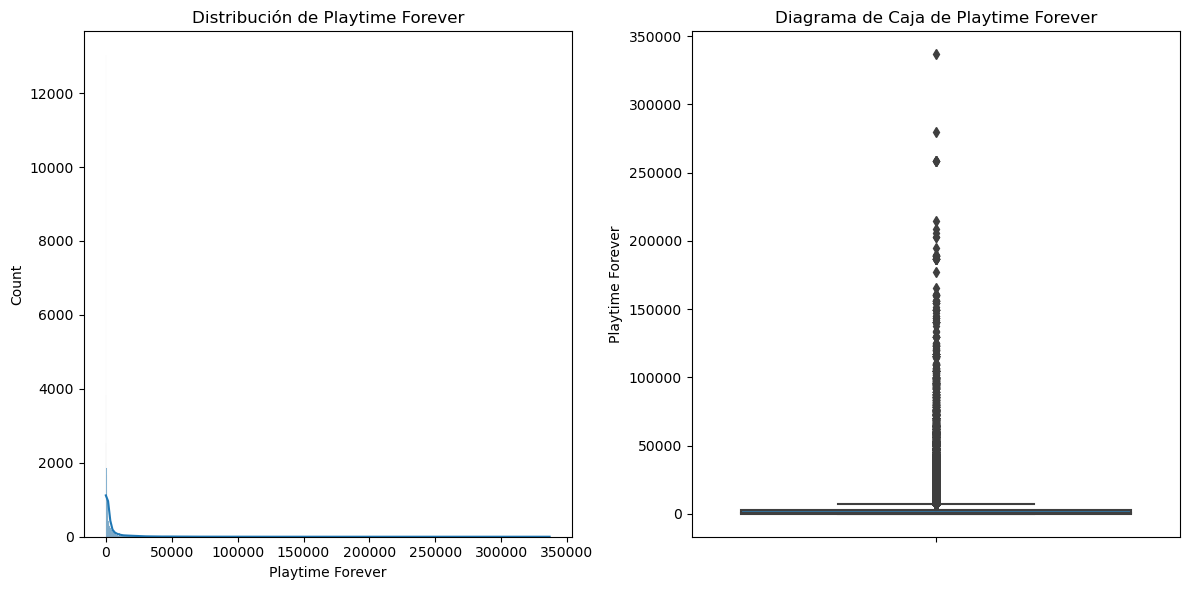

In [12]:
# Histograma y diagrama de caja de 'playtime_forever'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_completo['playtime_forever'], kde=True)
plt.xlabel('Playtime Forever')
plt.title('Distribución de Playtime Forever')

plt.subplot(1, 2, 2)
sns.boxplot(y='playtime_forever', data=df_completo)
plt.ylabel('Playtime Forever')
plt.title('Diagrama de Caja de Playtime Forever')

plt.tight_layout()
plt.show()

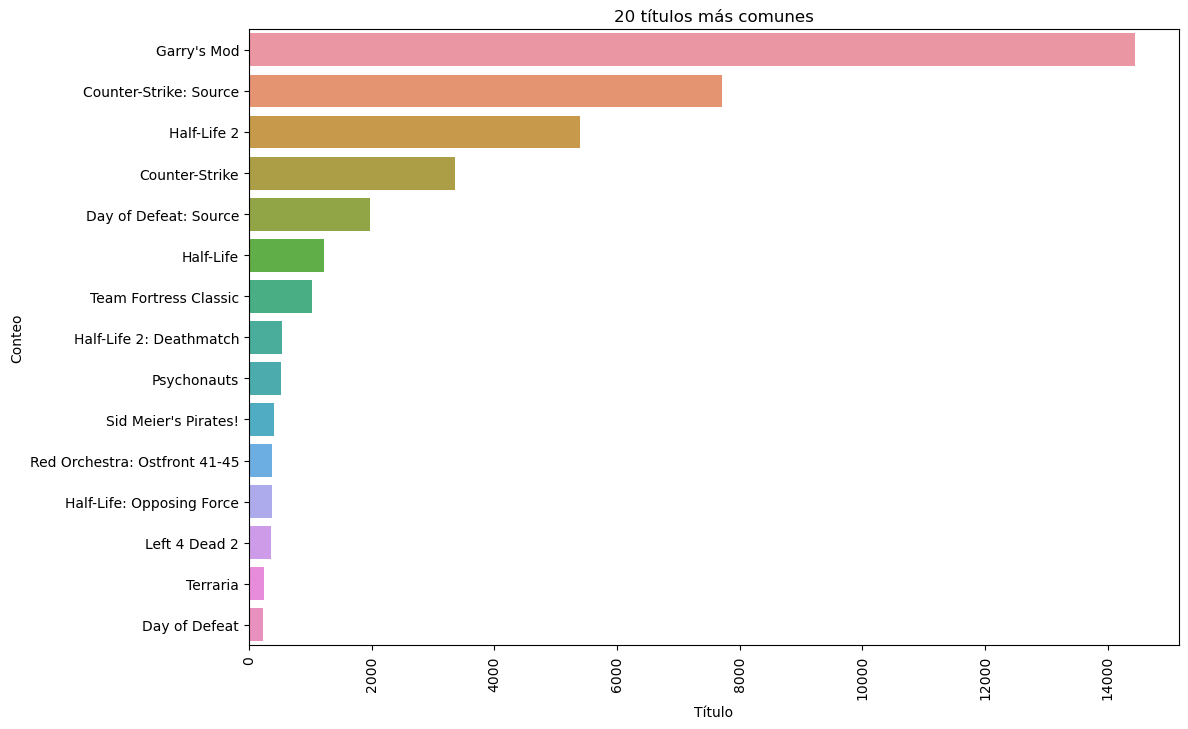

In [13]:
# Obtener los 20 títulos más comunes
top_titles = df_completo['app_name'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()

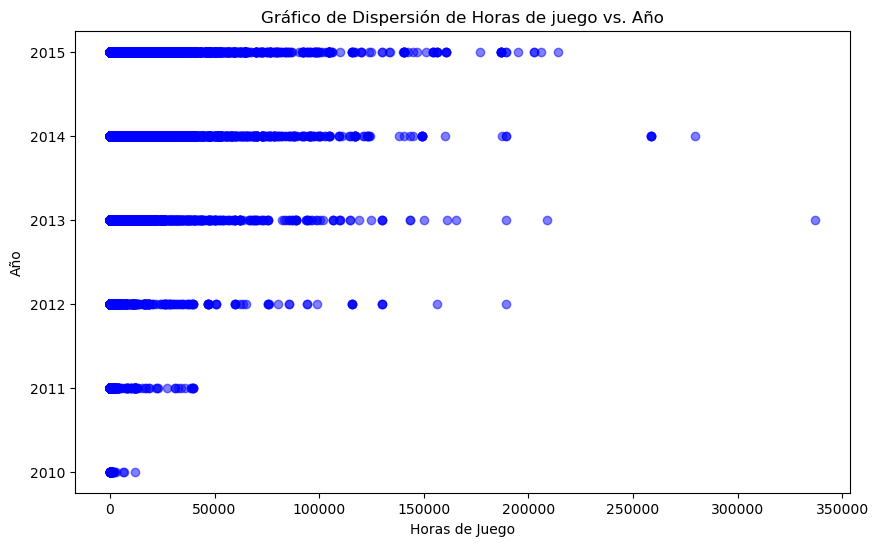

In [14]:
plt.figure(figsize=(10, 6))

# Crea el scatter plot de playtime vs. price
plt.scatter(df_EDA['playtime_forever'], df_EDA['posted year'], color='blue', alpha=0.5)

# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

In [15]:
df_completo['posted year'].values

array([2011, 2011, 2011, ..., 2015, 2015, 2015], dtype=int64)